# Tutorial 2 - The Queens & The Art of Branching

**Important:** You must fully complete Tutorial $i-1$ before starting Tutorial $i$ ($i>1$).

Constraint programming is used to solve highly combinatorial and complex problems. 
In order to master CP, you need to get used to the philosophy behind this approach as well as the different 
techniques used along with it. We will guide you in this process step by step in the upcoming tutorials. We will be using "toy" puzzles/problems only for the purpose of learning different faces of CP. In real life problems, things get messed up easily and require decision and policy makes to agree opon the problem at hand.. (Trust us, we've been there..) 

In this tutorial, we use the N-Queens problem, one of oldest and classical problems solved efficiently by CP, as a case study. 

## 1. The N-Queens problem

You are given an N-by-N chessboard, and your goal is to place N chess queens on it so that no two queens threaten each other:

<div class="row" style="margin-top: 10px">
    <div class="col-md-5">
        <img src="display/images/empty-chessboard.png" style="margin-right: 0; width: 160px;" />
    </div>
    <div class="col-md-2" style="display: table">
        <i class="fa fa-arrow-right" style="display: table-cell; font-size: 50px; 
        margin: auto; text-align: center; vertical-align: middle; height: 150px"></i>
    </div>
    <div class="col-md-5">
        <img src="display/images/nqueens8-chessboard.png" style="margin-left: 0; width: 160px;" />
    </div>
</div>

Formally, a solution to the N-queens problem requires that no two queens share the same row, column or diagnoal.

### 1.1. Model without global constraints

**Exercice**: Create a function `decomposition_model(N)` that models the problem using only binary inequality constrants (no global constraint) and returns an instance of `CpoModel` for the n-queens problem with `N` queens.

In [8]:
from config import setup
setup()
from display import n_queens as display_queens


ModuleNotFoundError: No module named 'display'

In [9]:
from docplex.cp.model import CpoModel

def decomposition_model(N: int) -> CpoModel:
    mdl = CpoModel(name='N-Queens model')

    #Variables
    x = mdl.integer_var_list(N, min=0, max=N-1, name='x')

    #Contraintes
    for i in range(N) :
        for j in range(N) :
            #interdiction de placer 2 reines sur la même ligne
            if i != j:
                mdl.add(x[i] != x[j])
            #interdiction de placer 2 reines sur la même diagonale
            if i < j :
                mdl.add(j-i != mdl.abs(x[j]-x[i]))
    
    return mdl

**Exercice:** Test your function by solving the n-queens problem for small values of $N$ ($N < 20$).

<div class="alert alert-block alert-info">
    
Use the `display.n_queens` function in order to display a solution for the n-queens problem. This function can take a list of `int` corresponding to the column of the queens in order to display them.
    
</div>

In [11]:
#from display import n_queens as display_queens
mdl = decomposition_model(5)
sol = mdl.solve()
sol.print_solution()
#display_queens([var.get_value() for var in sol.get_all_var_solutions()])
#lignes et colonnes swap

mdl = decomposition_model(15)
sol = mdl.solve()
sol.print_solution()
#display_queens([var.get_value() for var in sol.get_all_var_solutions()])

-------------------------------------------------------------------------------
Model constraints: 30, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
-------------------------------------------------------------------------------
x0: 1
x1: 4
x2: 2
x3: 0
x4: 3
-------------------------------------------------------------------------------
Model constraints: 315, variables: integer: 15, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.01 sec
-------------------------------------------------------------------------------
x0: 2
x1: 7
x10: 0
x11: 4
x12: 11
x13: 1
x14: 8
x2: 14
x3: 10
x4: 13
x5: 6
x6: 3
x7: 5
x8: 12
x9: 9


**Question**: How many solutions are there for $N = 3,~\ldots,~10$? 

**Note:** To answer this question, you must force the solver to use a depth first strategy using  `CpoModel.start_search(SearchType="DepthFirst")`.

In [4]:
n_range = range(3,11)

for n in n_range :
    mdl = decomposition_model(n)
    lsols = mdl.start_search(SearchType='DepthFirst')
    sol_nb = 0
    for sol in lsols :
        sol_nb = sol_nb + 1
    print("n : " + str(n) + " solutions : " + str(sol_nb))

n : 3 solutions : 0
n : 4 solutions : 2
n : 5 solutions : 10
n : 6 solutions : 4
n : 7 solutions : 40
n : 8 solutions : 92
n : 9 solutions : 352
n : 10 solutions : 724


### 1.2. Model with global constraints

**Exercice:** Create a function `global_constraint_model(N)` that models and returns an instance of `CpoModel` for the n-queens problem with `N` queens, using **only** and exaclty 3 global constraints.

In [3]:
from docplex.cp.model import CpoModel
import numpy as np


def global_constraint_model(N: int) -> CpoModel:
    mdl = CpoModel(name='N-Queens model')

    #Variables
    x = mdl.integer_var_list(N, min=0, max=N-1, name='x')
    
    #Contraintes
    #interdiction de placer 2 reines sur la même ligne
    mdl.add(mdl.all_diff(x))
    
    #interdiction de placer 2 reines sur la même diagonale
    #montant
    mdl.add(mdl.all_diff(x+np.arange(N-1, -1, -1)))
    #descendant
    mdl.add(mdl.all_diff(x+np.arange(0, N, 1)))

    return mdl

**Exercice:** Test your function by solving the n-queens problem for small values of $N$ ($N < 20$).

-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 5, interval: 0, sequence: 0
Solve status: Feasible, Fail status: SearchHasNotFailed
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
-------------------------------------------------------------------------------

x_0=3
x_1=1
x_2=4
x_3=2
x_4=0


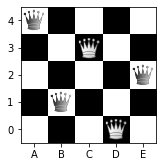

-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 15, interval: 0, sequence: 0
Solve status: Feasible, Fail status: SearchHasNotFailed
Search status: SearchCompleted, stop cause: SearchHasNotBeenStopped
Solve time: 0.0 sec
-------------------------------------------------------------------------------

x_0=7
x_1=14
x_2=1
x_3=3
x_4=5
x_5=9
x_6=11
x_7=13
x_8=2
x_9=12
x_10=6
x_11=8
x_12=10
x_13=0
x_14=4


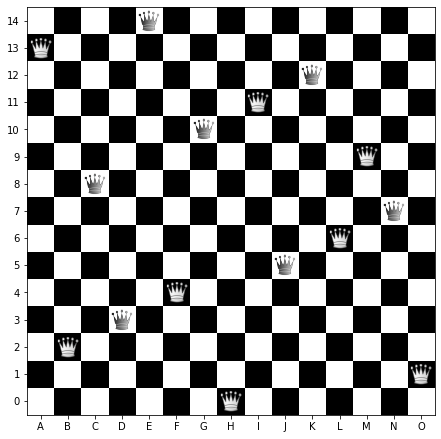

In [6]:
from display import n_queens as display_queens
mdl = global_constraint_model(5)
sol = mdl.solve()
sol.print_solution()
display_queens([var.get_value() for var in sol.get_all_var_solutions()])

mdl = global_constraint_model(15)
sol = mdl.solve()
sol.print_solution()
display_queens([var.get_value() for var in sol.get_all_var_solutions()])

**Question**: How many solutions are there for $N = 3,~\ldots,~10$?

**Important:** You should obtain the same number as the previous model!

In [7]:
n_range = range(3,11)

for n in n_range :
    mdl = global_constraint_model(n)
    lsols = mdl.start_search(SearchType='DepthFirst')
    sol_nb = 0
    for sol in lsols :
        sol_nb = sol_nb + 1                                                                                                                   
    print("n : " + str(n) + " solutions : " + str(sol_nb))

n : 3 solutions : 0
n : 4 solutions : 2
n : 5 solutions : 10
n : 6 solutions : 4
n : 7 solutions : 40
n : 8 solutions : 92
n : 9 solutions : 352
n : 10 solutions : 724


## 2. Comparison of the two models

We will compare the two models properly. 

**Exercice:** Consider the `run(model, params)` function that we used in the first tutorial and paste it here.

In [4]:
from docplex.cp.parameters import CpoParameters

def run(model: CpoModel, params: CpoParameters):
    sol = model.solve(TimeLimit=params.TimeLimit, LogPeriod=params.LogPeriod)
    return [sol.get_solver_infos()['NumberOfBranches'], sol.get_solver_infos()['TotalTime'], sol.get_solve_status()]

### 2.1. Basic comparison

To compare the two models, we will fix the time limit to 5 seconds, i.e. `TimeLimit=5`, while keeping all the other parameters to their default values.

**Exercice:** Compare the two models for $N \in \{200, 400, 600, .., 2000 \}$. 

<div class="alert alert-block alert-info">
    
By *comparing* we mean plotting the runtime **and** the number of decisions made by the solver for each model as a function of $n$
    
</div>

In [9]:
from docplex.cp.parameters import CpoParameters

params = CpoParameters(TimeLimit=5, LogPeriod=100000)

results_no_global = {'runtime':[], 'nodes':[], 'status':[]}
results_global = {'runtime':[], 'nodes':[], 'status':[]}

#2000 pc plante
for n in range(200, 1801, 200) : 
    print(n)
    result = run(decomposition_model(n), params)
    results_no_global['nodes'].append(result[0])
    results_no_global['runtime'].append(result[1])
    results_no_global['status'].append(result[2])
    
    result = run(global_constraint_model(n), params)
    results_global['nodes'].append(result[0])
    results_global['runtime'].append(result[1])
    results_global['status'].append(result[2])

200
400
600
800
1000
1200
1400
1600
1800


LocalSolverException: Nothing to read from local solver process. Process seems to have been stopped (rc=-9).

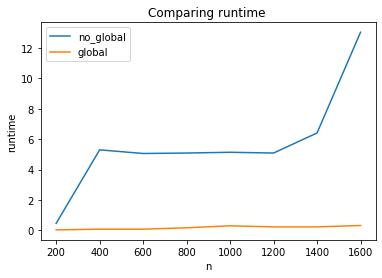

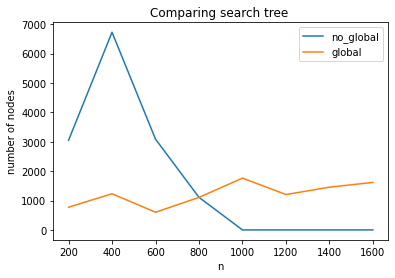

In [11]:
import matplotlib.pyplot as plt
abscisse = range(200, 1800, 200)

#RUNTIME PLOT
plt.plot(abscisse, results_no_global['runtime'], label = "no_global")
plt.plot(abscisse, results_global['runtime'], label = "global")
plt.xlabel('n')
plt.ylabel('runtime')
plt.title('Comparing runtime ')
plt.legend()
plt.show()

#SEARCH TREE PLOT
plt.plot(abscisse, results_no_global['nodes'], label = "no_global")
plt.plot(abscisse, results_global['nodes'], label = "global")
plt.xlabel('n')
plt.ylabel('number of nodes')
plt.title('Comparing search tree ')
plt.legend()
plt.show()

**Question:** What do you observe? Why? 

### 2.2. Branching strategies


**Important:** Before you start this part, please ask one of your supervisors to check on your work.

A CP solver is, at the end of the day, a backtracking solver. At each node, it applies filtering (called also propagation or pruning), then make a decision about the next node to explore. This decision is a pure heuristic choice, that is, it could be a wrong decision, it is only based on intuition. 

In CP, a decision is, most of the times, of the type: choose an unassigned variable $x$, choose a value $v$ from the current domain of $x$, and assign $v$ to $x$. These steps require a variable heuristic and a value heuristic. This is what we call branching strategy. 

Branching strategies can be generic (strategies that can be used for any problem), or specific (designed for the problem at hand). In CPOptimizer, there are a number of genereic strategies offered. This concerns both variable and value heuristics. 

For example, if $L$ is the list of decision variables, then by declaring a search_phase as follows: 

```python
SearchPhase= model.search_phase(L, 
                                varchooser=model.select_smallest(model.domain_size()),
                                valuechooser=model.select_random_value())

model.add_search_phase(SearchPhase)
```

The variable heuristic here is the one that picks the variable $x$ with the smallest domain size, and assigns a random value from its domain to it. 


Read about the different search strategies here: 
http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.modeler.py.html#search-phases


We want to evaluate different strategies: 
- For variable evaluators, we will use 
 - `domain_size()`
 - `var_impact()`
 - `var_local_impact()`
 - `var_index()`
 
- For value evaluators, we will use 
 - `value_impact()`
 - `value_index()`
 
As for the selectors we will use : 
- `select_smallest()` 
- `select_largest()`

**Question:** How many strategies are we going to evaluate? 

**Question:** In addition to the above strategies, we will use also a pure random selection for variables and values. How can we use such a branching heuristic? 

Using the global constraints model, run the different strategies (**all of them, and pure random**) for different values of $N$. Make sure you choose a good value of $N$ that can assess your claims of evaluation. Feel free to use any reasnable time limit. 

<div class="alert alert-block alert-danger">

**Important:** For this exercice, you must set the `SearchType` to `DepthFirst` using `SearchType="DepthFirst"` when calling `run`.

We will investigate deeply this choice in the next tutorial. But at this stage you should trust us and include it in the solver's parameters.
    
</div>

**Exercice:** Present the results (rutime + number of nodes) via a table first then using plots. 

In [21]:
mdl.search_phase(varchooser = mdl.select_smallest(mdl.domain_size()), valuechooser = mdl.select_smallest(mdl.value_impact()))

In [5]:
from docplex.cp.parameters import CpoParameters

def run(model: CpoModel, params: CpoParameters):
    sol = model.solve(TimeLimit=params.TimeLimit, LogPeriod=params.LogPeriod, SearchType="DepthFirst")
    return [sol.get_solver_infos()['NumberOfBranches'], sol.get_solver_infos()['TotalTime'], sol.get_solve_status()]

n_range = [10, 20, 50, 100, 500, 800, 1000]

results = [{'runtime':[], 'nodes':[], 'status':[]} for i in range(33)]
params = CpoParameters(TimeLimit=10, LogPeriod=100000)

for n in n_range :
    print("n : " + str(n))
    mdl = global_constraint_model(n)
    
    variables = [mdl.domain_size(), mdl.var_impact(), mdl.var_local_impact(), mdl.var_index(mdl.get_all_variables())]
    selectors = [mdl.select_smallest, mdl.select_largest]
    value = [mdl.value_impact(), mdl.value_index([j for j in range(n)])]
    i = 0
    
    for (var, val) in [(c1(c2), c3(c4)) for c1 in selectors for c2 in variables for c3 in selectors for c4 in value] :
        phase = mdl.search_phase(varchooser=var, valuechooser=val)
        mdl.set_search_phases([phase])
        
        result = run(mdl, params)
        
        results[i]['nodes'].append(result[0])
        results[i]['runtime'].append(result[1])
        results[i]['status'].append(result[2])
        i = i + 1

n : 10
n : 20
n : 50
n : 100
n : 500
n : 800
n : 1000


In [6]:
#random select

for n in n_range :
    print("n : " + str(n))
    mdl = global_constraint_model(n)

    phase = mdl.search_phase(varchooser=mdl.select_random_var(), valuechooser=mdl.select_random_value())
    
    mdl.set_search_phases([phase])

    result = run(mdl, params)

    results[32]['nodes'].append(result[0])
    results[32]['runtime'].append(result[1])
    results[32]['status'].append(result[2])

n : 10
n : 20
n : 50
n : 100
n : 500
n : 800
n : 1000


In [8]:
results

[{'runtime': [0, 0, 0, 0.01, 5, 0.17],
  'nodes': [24, 76, 1065, 137, 656412, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Feasible']},
 {'runtime': [0, 0, 0.01, 0, 5, 0.18],
  'nodes': [24, 76, 1065, 137, 728420, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Feasible']},
 {'runtime': [0.01, 0, 0.01, 0, 5, 0.14],
  'nodes': [24, 76, 1065, 137, 708961, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Feasible']},
 {'runtime': [0.01, 0, 0.01, 0, 5, 0.17],
  'nodes': [24, 76, 1065, 137, 694821, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Feasible']},
 {'runtime': [0.01, 0.32, 5, 5, 5, 5],
  'nodes': [52, 74650, 759700, 507667, 158783, 89043],
  'status': ['Feasible',
   'Feasible',
   'Unknown',
   'Unknown',
   'Unknown',
   'Unknown']},
 {'runtime': [0, 0.31, 5, 5, 5, 5],
  'nodes': [52, 74650, 645

# Plots

In [8]:
import matplotlib.pyplot as plt

def plot_result(x, results, title, x_label, y_label):
    for label in results :
        plt.plot(x, results[label], label = label)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.show()


# Compare value chooser

## var chooser = select smallest

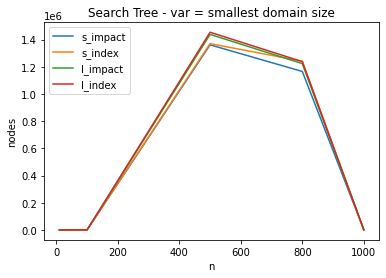

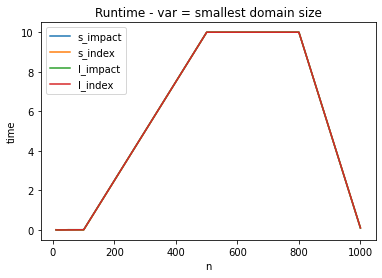

In [9]:
r = {'s_impact':results[0]['nodes'],
    's_index' : results[1]['nodes'],
    'l_impact': results[2]['nodes'],
    'l_index' : results[3]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = smallest domain size", x_label="n", y_label="nodes")

r = {'s_impact':results[0]['runtime'],
    's_index' : results[1]['runtime'],
    'l_impact': results[2]['runtime'],
    'l_index' : results[3]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = smallest domain size", x_label="n", y_label="time")


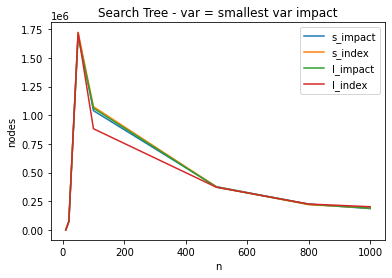

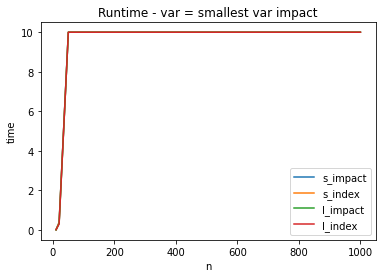

In [10]:
r = {'s_impact':results[4]['nodes'],
    's_index' : results[5]['nodes'],
    'l_impact': results[6]['nodes'],
    'l_index' : results[7]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = smallest var impact", x_label="n", y_label="nodes")

r = {'s_impact':results[4]['runtime'],
    's_index' : results[5]['runtime'],
    'l_impact': results[6]['runtime'],
    'l_index' : results[7]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = smallest var impact", x_label="n", y_label="time")


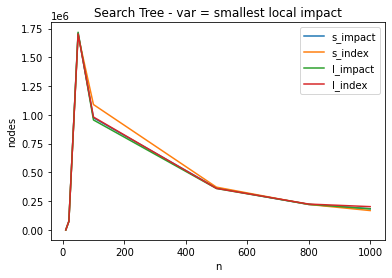

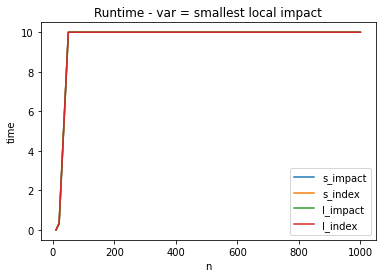

In [11]:
r = {'s_impact':results[8]['nodes'],
    's_index' : results[9]['nodes'],
    'l_impact': results[10]['nodes'],
    'l_index' : results[11]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = smallest local impact", x_label="n", y_label="nodes")

r = {'s_impact':results[8]['runtime'],
    's_index' : results[9]['runtime'],
    'l_impact': results[10]['runtime'],
    'l_index' : results[11]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = smallest local impact", x_label="n", y_label="time")


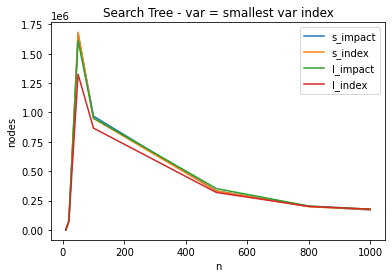

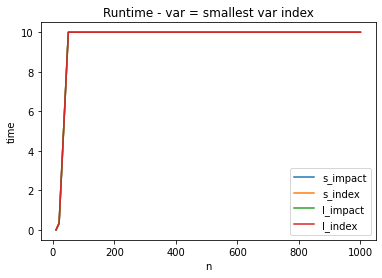

In [12]:
r = {'s_impact':results[12]['nodes'],
    's_index' : results[13]['nodes'],
    'l_impact': results[14]['nodes'],
    'l_index' : results[15]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = smallest var index", x_label="n", y_label="nodes")

r = {'s_impact':results[12]['runtime'],
    's_index' : results[13]['runtime'],
    'l_impact': results[14]['runtime'],
    'l_index' : results[15]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = smallest var index", x_label="n", y_label="time")


## varchooser = select largest

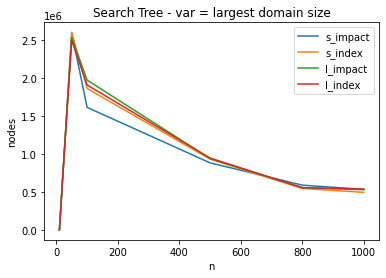

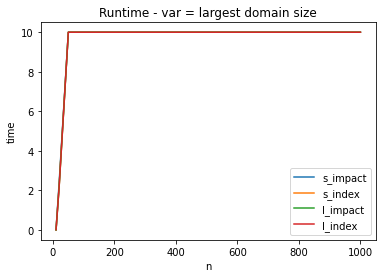

In [13]:
r = {'s_impact':results[16]['nodes'],
    's_index' : results[17]['nodes'],
    'l_impact': results[18]['nodes'],
    'l_index' : results[19]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = largest domain size", x_label="n", y_label="nodes")

r = {'s_impact':results[16]['runtime'],
    's_index' : results[17]['runtime'],
    'l_impact': results[18]['runtime'],
    'l_index' : results[19]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = largest domain size", x_label="n", y_label="time")


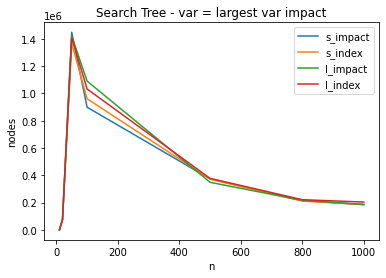

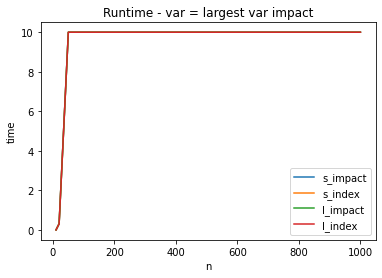

In [14]:
r = {'s_impact':results[20]['nodes'],
    's_index' : results[21]['nodes'],
    'l_impact': results[22]['nodes'],
    'l_index' : results[23]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = largest var impact", x_label="n", y_label="nodes")

r = {'s_impact':results[20]['runtime'],
    's_index' : results[21]['runtime'],
    'l_impact': results[22]['runtime'],
    'l_index' : results[23]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = largest var impact", x_label="n", y_label="time")


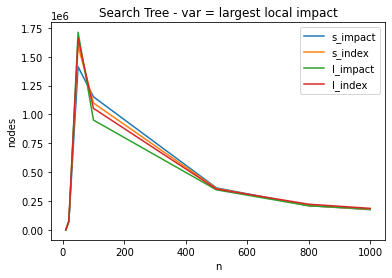

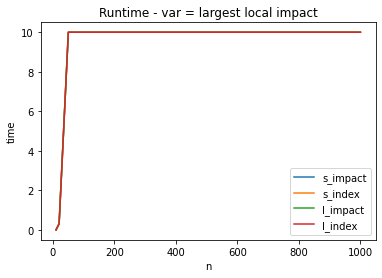

In [15]:
r = {'s_impact':results[24]['nodes'],
    's_index' : results[25]['nodes'],
    'l_impact': results[26]['nodes'],
    'l_index' : results[27]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = largest local impact", x_label="n", y_label="nodes")

r = {'s_impact':results[24]['runtime'],
    's_index' : results[25]['runtime'],
    'l_impact': results[26]['runtime'],
    'l_index' : results[27]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = largest local impact", x_label="n", y_label="time")


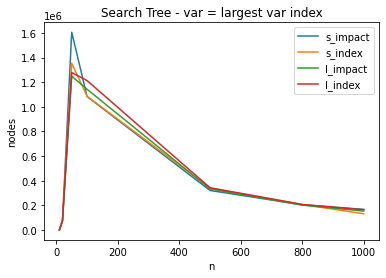

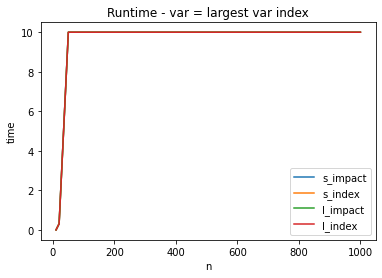

In [16]:
r = {'s_impact':results[28]['nodes'],
    's_index' : results[29]['nodes'],
    'l_impact': results[30]['nodes'],
    'l_index' : results[31]['nodes'],}
plot_result(x=n_range, results=r, title="Search Tree - var = largest var index", x_label="n", y_label="nodes")

r = {'s_impact':results[28]['runtime'],
    's_index' : results[29]['runtime'],
    'l_impact': results[30]['runtime'],
    'l_index' : results[31]['runtime'],}
plot_result(x=n_range, results=r, title="Runtime - var = largest var index", x_label="n", y_label="time")


# Compare var chooser

## Value chooser = smallest value impact

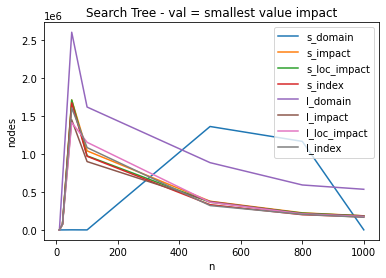

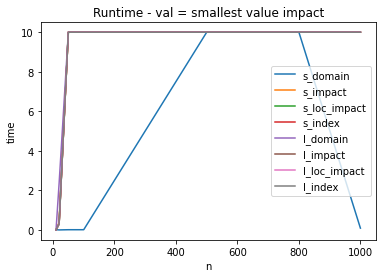

In [17]:
r = {'s_domain':    results[0]['nodes'],
    's_impact' :    results[4]['nodes'],
    's_loc_impact': results[8]['nodes'],
    's_index' :     results[12]['nodes'],
    'l_domain':     results[16]['nodes'],
    'l_impact' :    results[20]['nodes'],
    'l_loc_impact': results[24]['nodes'],
    'l_index' :     results[28]['nodes']}
plot_result(x=n_range, results=r, title="Search Tree - val = smallest value impact", x_label="n", y_label="nodes")

r = {'s_domain':    results[0]['runtime'],
    's_impact' :    results[4]['runtime'],
    's_loc_impact': results[8]['runtime'],
    's_index' :     results[12]['runtime'],
    'l_domain':     results[16]['runtime'],
    'l_impact' :    results[20]['runtime'],
    'l_loc_impact': results[24]['runtime'],
    'l_index' :     results[28]['runtime']}
plot_result(x=n_range, results=r, title="Runtime - val = smallest value impact", x_label="n", y_label="time")


## Value chooser = smallest value index

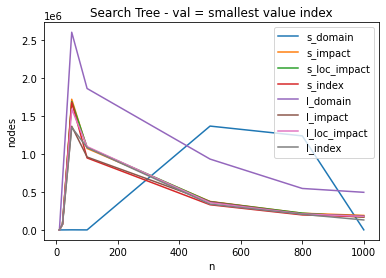

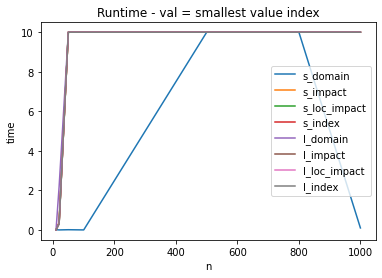

In [18]:
r = {'s_domain':    results[1]['nodes'],
    's_impact' :    results[5]['nodes'],
    's_loc_impact': results[9]['nodes'],
    's_index' :     results[13]['nodes'],
    'l_domain':     results[17]['nodes'],
    'l_impact' :    results[21]['nodes'],
    'l_loc_impact': results[25]['nodes'],
    'l_index' :     results[29]['nodes']}
plot_result(x=n_range, results=r, title="Search Tree - val = smallest value index", x_label="n", y_label="nodes")

r = {'s_domain':    results[1]['runtime'],
    's_impact' :    results[5]['runtime'],
    's_loc_impact': results[9]['runtime'],
    's_index' :     results[13]['runtime'],
    'l_domain':     results[17]['runtime'],
    'l_impact' :    results[21]['runtime'],
    'l_loc_impact': results[25]['runtime'],
    'l_index' :     results[29]['runtime']}
plot_result(x=n_range, results=r, title="Runtime - val = smallest value index", x_label="n", y_label="time")


## Value chooser = largest value impact

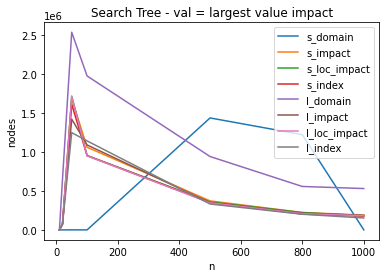

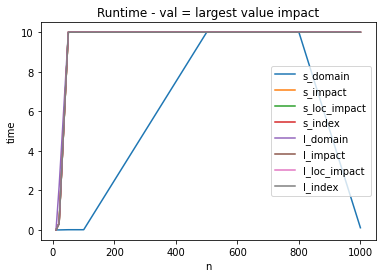

In [19]:
r = {'s_domain':    results[2]['nodes'],
    's_impact' :    results[6]['nodes'],
    's_loc_impact': results[10]['nodes'],
    's_index' :     results[14]['nodes'],
    'l_domain':     results[18]['nodes'],
    'l_impact' :    results[22]['nodes'],
    'l_loc_impact': results[26]['nodes'],
    'l_index' :     results[30]['nodes']}
plot_result(x=n_range, results=r, title="Search Tree - val = largest value impact", x_label="n", y_label="nodes")

r = {'s_domain':    results[2]['runtime'],
    's_impact' :    results[6]['runtime'],
    's_loc_impact': results[10]['runtime'],
    's_index' :     results[14]['runtime'],
    'l_domain':     results[18]['runtime'],
    'l_impact' :    results[22]['runtime'],
    'l_loc_impact': results[26]['runtime'],
    'l_index' :     results[30]['runtime']}
plot_result(x=n_range, results=r, title="Runtime - val = largest value impact", x_label="n", y_label="time")


## Value chooser = larget value index

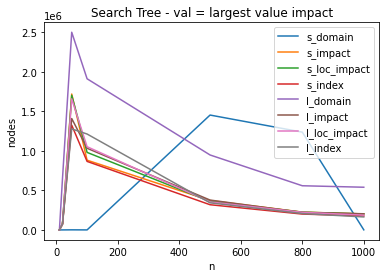

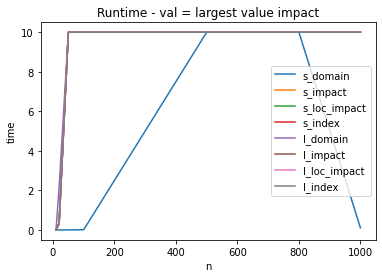

In [20]:
r = {'s_domain':    results[3]['nodes'],
    's_impact' :    results[7]['nodes'],
    's_loc_impact': results[11]['nodes'],
    's_index' :     results[15]['nodes'],
    'l_domain':     results[19]['nodes'],
    'l_impact' :    results[23]['nodes'],
    'l_loc_impact': results[27]['nodes'],
    'l_index' :     results[31]['nodes']}
plot_result(x=n_range, results=r, title="Search Tree - val = largest value impact", x_label="n", y_label="nodes")

r = {'s_domain':    results[3]['runtime'],
    's_impact' :    results[7]['runtime'],
    's_loc_impact': results[11]['runtime'],
    's_index' :     results[15]['runtime'],
    'l_domain':     results[19]['runtime'],
    'l_impact' :    results[23]['runtime'],
    'l_loc_impact': results[27]['runtime'],
    'l_index' :     results[31]['runtime']}
plot_result(x=n_range, results=r, title="Runtime - val = largest value impact", x_label="n", y_label="time")


## Random select

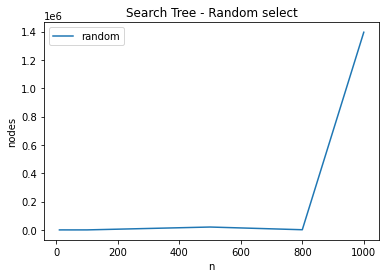

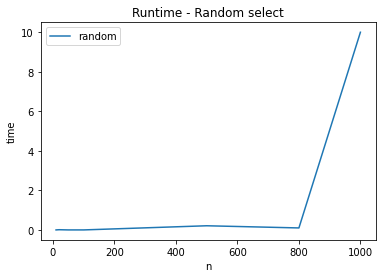

In [21]:
r = {'random': results[32]['nodes']}
plot_result(x=n_range, results=r, title="Search Tree - Random select", x_label="n", y_label="nodes")

r = {'random': results[32]['runtime']}
plot_result(x=n_range, results=r, title="Runtime - Random select", x_label="n", y_label="time")


In [22]:
results

[{'runtime': [0.01, 0, 0.01, 0.01, 10, 10, 0.09],
  'nodes': [24, 76, 1065, 137, 1360977, 1165146, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Unknown',
   'Feasible']},
 {'runtime': [0.01, 0, 0.01, 0, 10, 10, 0.1],
  'nodes': [24, 76, 1065, 137, 1369767, 1240468, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Unknown',
   'Feasible']},
 {'runtime': [0, 0, 0.01, 0.01, 10, 10, 0.11],
  'nodes': [24, 76, 1065, 137, 1437702, 1222931, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Unknown',
   'Feasible']},
 {'runtime': [0, 0, 0, 0.01, 10, 10, 0.11],
  'nodes': [24, 76, 1065, 137, 1453516, 1237387, 995],
  'status': ['Feasible',
   'Feasible',
   'Feasible',
   'Feasible',
   'Unknown',
   'Unknown',
   'Feasible']},
 {'runtime': [0.01, 0.38, 10, 10, 10, 10, 10],
  'nodes': [52, 74650, 1709312, 1040041, 377077, 224831, 185818],
  'status': ['Feasib

**Question:** Is this what you expect? Is the choice of the branching strategy important? Justify.

On attendait plus de variations et moins de timeout : presque toutes les stratégies ont un timeout après n=50

**Question:** What is more important, the variable ordering or the value ordering choice? Justify.

Pour un value chooser donné, le choix du var chooser impacte plus les résultats. Alors que sur les plots on remarque que pour un var chooser donné, le value chooser ne change rien aux résultats.

**Question:** What is the best variable ordering choice? Justify.

Le meilleur semble être le smallest domain size : il a le moins de timeout, le moins de noeuds, et le plus de solutions feasible (les autres ont trop de unknown)

**Question:** What is the best value ordering choice? Justify.

Pas de différences observées

**Question:** What is a good branching overall? Any thoughts why this is the case? Justify.

Le random est étonnement plutôt bon dans notre cas

**Question:** Did you observe an opposite behaviour of heuristics betwen the runtime and the number of nodes? 
For instance, is there a strategy that is faster than others to solve the problem but requires a larger number of nodes? 
And conversely, is there a heuristic that is slow to solve the problem than others but uses less nodes? 
If you observe this, why is this happening?

## 3. Conclusion

**Question:** What did you learn today? 

Ce TP nous a permis d'analyser plus en détail la contrainte all diff ainsi que de découvrir et comparer les search phases.

Analyse plus approfondie de la contrainte globale all dif : 
 - comparaison avec ou sans contraintes globales
 - aide à réduire drastiquement le nombre de contraintes
 - réduction de la taille de l'arbre de recherche (cf. le second graphe)
 - gain de temps considérable : reste en dessous de 1seconde quand sans all diff on a un time out (cf. le premier graphe)

Découvertes des search phases : 
 - observation de l'impact des choix (sélecteur, choix des variables, choix des valeurs)
 - nous avons fixé le value chooser et fait varier le var chooser (et inversement)
 - pour un value chooser donné, le var chooser a eu peu d'impact sur notre cas
 - pour un var chooser donné, le value chooser a eu un peu plus d'impact sur notre cas
 - globalement nous avons eu beaucoup de time out (dès n=50)
 - le var chooser "smallest domain size" semble meilleur, il a moins de time out, moins de noeuds explorés et plus de solutions faisables
 - l'utilisation du random a été etonnament bon dans notre cas : exécution rapide et arbre de recherche assez petit jusqu'à n=800 (cf. les deux derniers graphes)

Conclusion sur les search phases : 
 - dans notre cas le random semble être le meileur
 - difficile de trouver les avantages et inconvénients car nous avons eu beaucoup de time out
 - il faudrait refaire l'observation sur d'autres problèmes pour avoir plus de résultats

<div class="alert alert-block alert-danger"></div>